## This script is used to check the mocks we use

### Current version -- AbacusHF-v1: 

box_path = /global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0/\<realization\>/Boxes/\<tracer\>/abacus_HF_\<tracer\>_\<redshift\>_\<version\>_\<realization\>_clustering.dat.fit

cutsky_path = /global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0/\<realization\>/Cutsky/\<tracer\>/abacus_HF_\<tracer\>_\<redshift\>_\<version\>_\<realization\>_clustering.dat.fit

forclustering_path = /global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0/\<realization\>/Cutsky/\<tracer\>/abacus_HF_\<tracer\>_\<redshift\>_\<version\>_\<realization\>_clustering.dat.fit

In [3]:
import sys
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column

sys.path.append('/global/homes/s/shengyu/desi_y3_redshift_errors/main/')
from helper import REDSHIFT_OVERALL, COLOR_OVERALL
from helper import REDSHIFT_VSMEAR, REDSHIFT_LSS_VSMEAR, REDSHIFT_CUBICBOX, EDGES, COLOR_TRACERS, GET_RECON_BIAS

ABACUSHF_DIR = f'/global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0'

In [20]:
data_fn = ABACUSHF_DIR+ '/AbacusSummit_base_c000_ph000/Boxes/LRG/abacus_HF_LRG_0p500_DR2_v1.0_AbacusSummit_base_c000_ph000_clustering.dat.fits'
data = Table.read(data_fn)

data

X,Y,Z,VX,VY,VZ,HALO_MASS,HALO_ID,IS_CENTRAL
float64,float64,float64,float64,float64,float64,float64,int64,bool
-998.6694946289062,-999.3896484375,-663.2906494140625,10.265740095216584,266.5780354885274,912.4722635791048,11614711933135.018,285001000,True
-998.5205688476562,-998.8516235351562,79.28369903564453,-296.7538491330803,-219.10250760012465,-487.40419042366636,6382080680890.969,917000000,True
-999.5436401367188,-998.4382934570312,435.6242370605469,456.4253304047588,128.4366984790704,-226.6451039622638,8438435163332.705,1220000000,True
-998.9406127929688,-997.9343872070312,-654.687255859375,131.00042639457968,-195.82872132666907,285.580229486173,16467708511697.516,10293000000,True
-998.6441040039062,-998.1624145507812,-561.6430053710938,400.57338530974215,234.34802893373353,354.3194946442444,26315010130692.867,10372000000,True
-999.5943603515625,-997.7403564453125,741.9681396484375,449.16264803281825,57.81801221476887,-308.5042222157557,6854514941472.455,11480000000,True
-999.2175903320312,-997.933837890625,741.7716674804688,365.9791048858073,250.22452165112568,-64.73018781029172,5308558186980.359,11480000001,True
-998.2859497070312,-996.9385986328125,-535.5625,-42.90200497335152,433.64797260336564,-233.24540389053539,32870035496260.99,20394000000,True
-998.6669921875,-996.2734985351562,-67.93316650390625,-270.757413955437,-119.22690816103739,-42.33676444491049,5066013812128.258,20792000000,True


10212172722033.732

## Check the Cutsky mocks

In [11]:
data_fn = ABACUSHF_DIR+ '/AbacusSummit_base_c000_ph000/CutSky/LRG/z0.500/cutsky_LRG_z0.500_AbacusSummit_base_c000_ph000.fits'
data = Table.read(data_fn)

data 

RA,DEC,Z_COSMO,STATUS,RAW_NZ,RAN_NUM_0_1,NZ,Z,HALO_ID,HALO_MASS,IS_CENTRAL
float32,float32,float32,int32,float32,float32,float32,float32,int64,float32,bool
17.72037,20.497307,0.010497979,42,0.0008973729,0.19810149,0.0,0.010076427,2200070010000000,20329437000000.0,True
18.358932,23.168785,0.010508889,42,0.0008973729,0.8007446,0.0,0.010558409,2200070010000001,10655080000000.0,True
21.42871,28.056387,0.011969762,42,0.0008973729,0.9682616,0.0,0.011915651,2400090013005000,6529716600000.0,True
24.864092,27.895302,0.013859776,34,0.0008973729,0.31342417,0.0,0.01309043,2700120016002000,11121187000000.0,True
3.5962653,24.446495,0.012670616,42,0.0008973729,0.6923226,0.0,0.012805834,2800010013001000,5574302400000.0,True
29.721039,4.029662,0.01364716,42,0.0008973729,0.89460665,0.0,0.014413564,2900160002004000,10104610000000.0,True
41.08026,2.3175607,0.016398711,43,0.0008973729,0.08504421,0.00042017066,0.016711902,3000270001000000,7008478000000.0,True
14.15197,19.966831,0.014396515,42,0.0008973729,0.039054785,0.0,0.01428256,3300070012005000,5643902000000.0,True
66.85678,-8.329948,0.008779634,42,0.0008973729,0.28777534,0.0,0.009790924,800191697001000,8316108400000.0,True


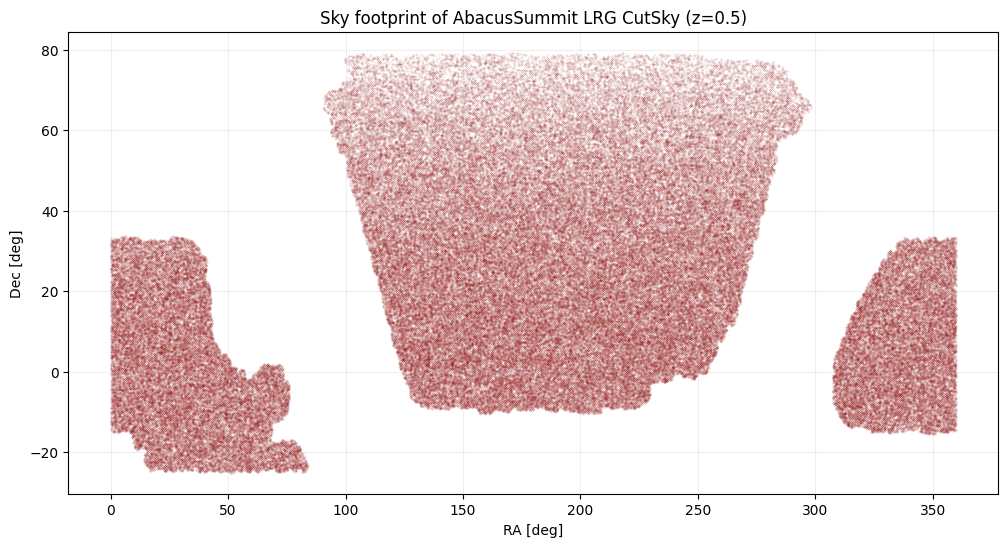

In [54]:
# Extract coordinates
ra = np.asarray(data['RA'])
dec = np.asarray(data['DEC'])

# If the catalog is huge, downsample for speed
idx = np.random.choice(len(ra), size=200000, replace=False)  # sample 2e5 points
ra, dec = ra[idx], dec[idx]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(ra, dec, s=0.05, color='darkred', alpha=0.3)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.title('Sky footprint of AbacusSummit LRG CutSky (z=0.5)')
plt.grid(alpha=0.2)
plt.show()

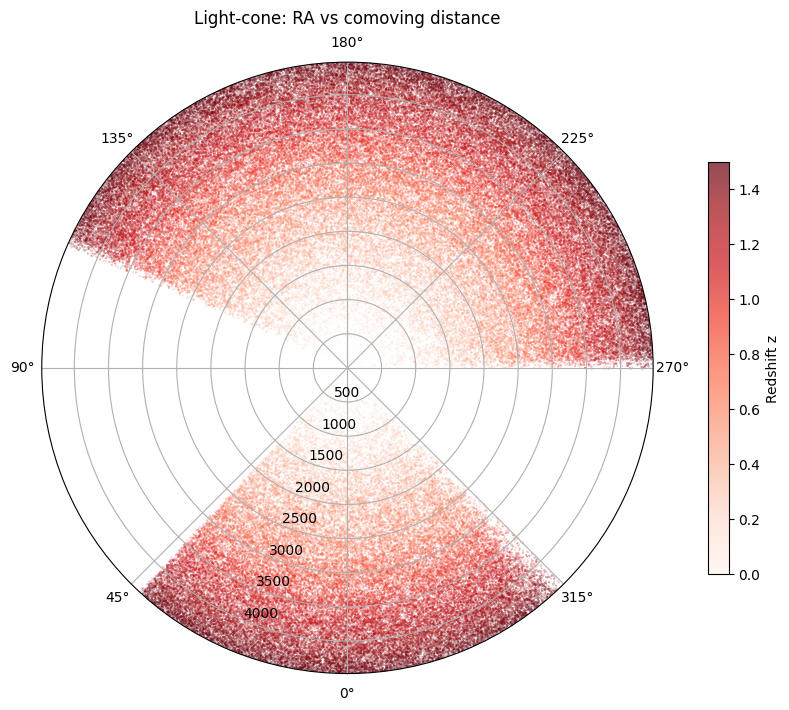

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from astropy.cosmology import Planck18 as cosmo

dec_band_halfwidth = 5.0
max_points = 200000
zmax = 1.5

ra  = np.asarray(data['RA'], dtype=float)
dec = np.asarray(data['DEC'], dtype=float)
z   = np.asarray(data['Z'],  dtype=float)

dec0 = np.nanmedian(dec)
sel = np.isfinite(z) & (dec > dec0 - dec_band_halfwidth) & (dec < dec0 + dec_band_halfwidth) & (z < zmax)
idx = np.where(sel)[0]
if idx.size > max_points:
    idx = np.random.choice(idx, size=max_points, replace=False)

theta = np.radians(ra[idx])
r = cosmo.comoving_distance(z[idx]).value  # Mpc
rmax = cosmo.comoving_distance(zmax).value

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

norm = Normalize(vmin=0.0, vmax=zmax)     # fixes colorbar range
sc = ax.scatter(theta, r, s=0.02, c=z[idx], cmap='Reds', norm=norm, alpha=0.7)

ax.set_theta_zero_location('S')
ax.set_theta_direction(-1)
ax.set_rmin(0); ax.set_rmax(rmax)
ax.set_title('Light-cone: RA vs comoving distance', va='bottom')

cb = plt.colorbar(sc, pad=0.08, fraction=0.03, shrink=0.8)
cb.set_label('Redshift z')

plt.tight_layout()
plt.show()

## Check the forclustering mocks

In [59]:
data_fn = ABACUSHF_DIR+ '/AbacusSummit_base_c000_ph000/CutSky/LRG/z0.500/forclustering/cutsky_abacusHF_DR2_LRG_z0p500_zcut_0p4to1p1_clustering.dat.fits'
data = Table.read(data_fn)

data

RA,DEC,TRUEZ,STATUS,RAW_NZ,RAN_NUM_0_1,NZ,Z,HALO_ID,HALO_MASS,IS_CENTRAL,WEIGHT,DESI_TARGET,PRIORITY_INIT,PRIORITY,NUMOBS_MORE,NUMOBS_INIT,BGS_TARGET,TARGETID,MWS_TARGET,SUBPRIORITY,BRICKNAME,OBSCONDITIONS,SCND_TARGET,ZWARN
float32,float32,float32,int32,float32,float32,float32,float32,int64,float32,bool,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,bytes8,int64,int64,int64
67.279564,1.3355781,0.39637807,35,0.0008973729,0.25898218,0.00055419706,0.40078488,35108400021002000,88636260000000.0,False,1.0,1,3200,3200,2,2,0,100605093,0,0.25138016107328864,000p0000,1,0,0
68.66768,-1.3406755,0.39677155,43,0.0008973729,0.589913,0.00055403064,0.4000821,33108491679000000,16505672000000.0,True,1.0,1,3200,3200,2,2,0,100605357,0,0.618578574508813,000p0000,1,0,0
67.66313,-2.0999813,0.39656883,43,0.0008973729,0.5170204,0.0005541164,0.40084955,34608431667000000,4815033000000.0,True,1.0,1,3200,3200,2,2,0,100605445,0,0.9796655831546774,000p0000,1,0,0
67.68721,-2.1535735,0.3973315,43,0.0008973729,0.52478796,0.0005537938,0.4002595,34608441666000000,23231533000000.0,True,1.0,1,3200,3200,2,2,0,100605446,0,0.6230454990014297,000p0000,1,0,0
63.55028,-7.9907236,0.39719322,43,0.0008973729,0.10918018,0.00055385224,0.40031442,40208091573000000,12089255000000.0,True,1.0,1,3200,3200,2,2,0,100605687,0,0.8821976397740235,000p0000,1,0,0
62.30003,-8.652832,0.39629152,43,0.0008973729,0.0055214786,0.0005542337,0.40041435,41807981563001000,4855105600000.0,True,1.0,1,3200,3200,2,2,0,100605747,0,0.9427858483108079,000p0000,1,0,0
67.13799,-2.6625009,0.39558944,43,0.0008973729,0.15657638,0.00055453065,0.40065953,35208381658001000,25119160000000.0,False,1.0,1,3200,3200,2,2,0,100605834,0,0.1680181124386757,000p0000,1,0,0
65.31822,-18.70759,0.3926182,43,0.0008973729,0.42452627,0.0005548824,0.4002996,35607781409004000,195235570000000.0,False,1.0,1,3200,3200,2,2,0,100605837,0,0.11786224927941535,000p0000,1,0,0
62.722187,-2.6784344,0.39696732,43,0.0008973729,0.59677297,0.0005539478,0.4010977,41608091658000000,254798150000000.0,False,1.0,1,3200,3200,2,2,0,100605863,0,0.07782714515781886,000p0000,1,0,0


In [73]:
data_fn

'/global/cfs/projectdirs/desi/mocks/cai/abacus_HF/DR2_v1.0/AbacusSummit_base_c000_ph000/CutSky/LRG/z0.500/forclustering/cutsky_abacusHF_DR2_LRG_z0p500_zcut_0p4to1p1_clustering.dat.fits'

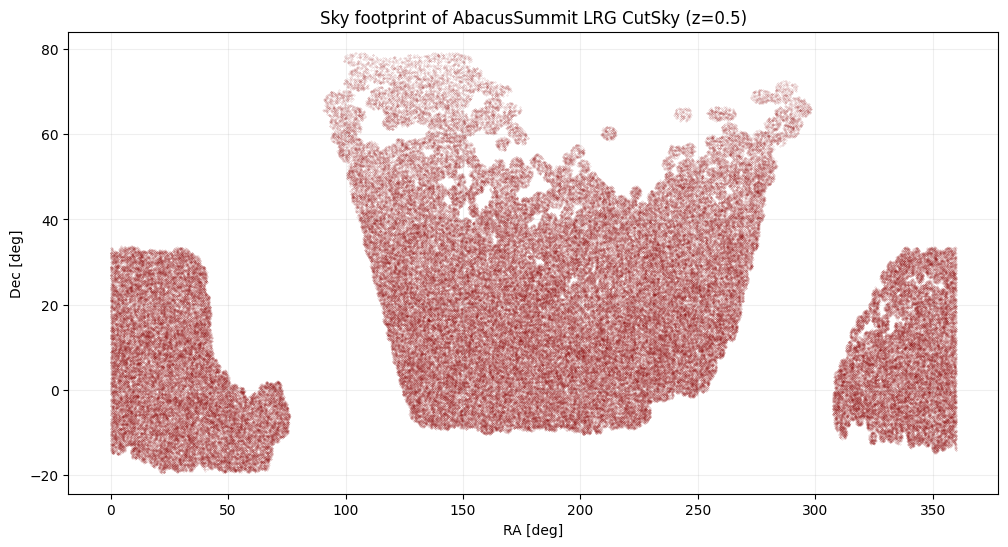

In [72]:
# Extract coordinates
ra = np.asarray(data['RA'])
dec = np.asarray(data['DEC'])

# If the catalog is huge, downsample for speed
idx = np.random.choice(len(ra), size=200000, replace=False)  # sample 2e5 points
ra, dec = ra[idx], dec[idx]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(ra, dec, s=0.05, color='darkred', alpha=0.3)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.title('Sky footprint of AbacusSummit LRG CutSky (z=0.5)')
plt.grid(alpha=0.2)
plt.show()

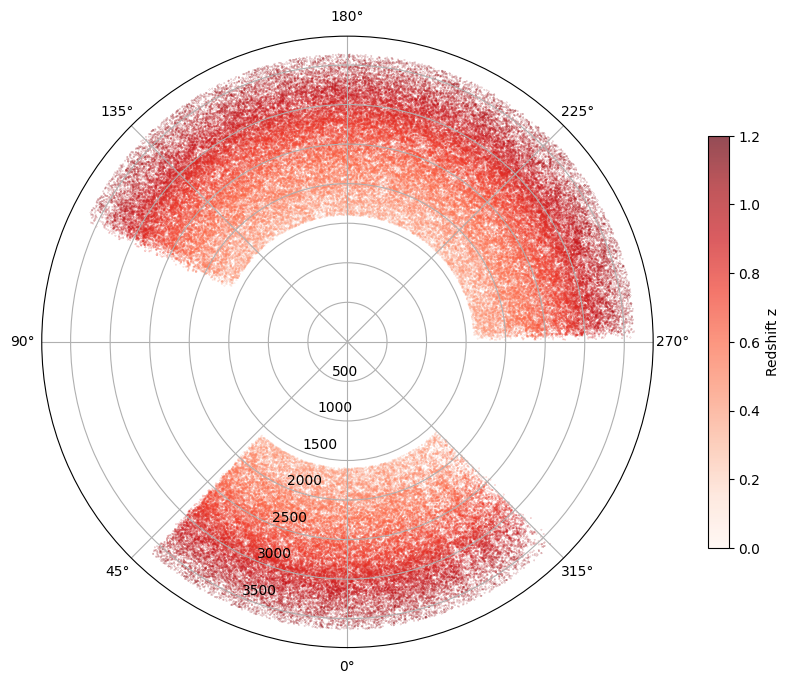

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from astropy.cosmology import Planck18 as cosmo

dec_band_halfwidth = 5.0
max_points = 200000
zmax = 1.2

ra  = np.asarray(data['RA'], dtype=float)
dec = np.asarray(data['DEC'], dtype=float)
z   = np.asarray(data['Z'],  dtype=float)

dec0 = np.nanmedian(dec)
sel = np.isfinite(z) & (dec > dec0 - dec_band_halfwidth) & (dec < dec0 + dec_band_halfwidth) & (z < zmax)
idx = np.where(sel)[0]
if idx.size > max_points:
    idx = np.random.choice(idx, size=max_points, replace=False)

theta = np.radians(ra[idx])
r = cosmo.comoving_distance(z[idx]).value  # Mpc
rmax = cosmo.comoving_distance(zmax).value

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

norm = Normalize(vmin=0.0, vmax=zmax)     # fixes colorbar range
sc = ax.scatter(theta, r, s=0.02, c=z[idx], cmap='Reds', norm=norm, alpha=0.7)

ax.set_theta_zero_location('S')
ax.set_theta_direction(-1)
# ax.set_rmin(0); ax.set_rmax(rmax)
# ax.set_title('Light-cone: RA vs comoving distance', va='bottom')

cb = plt.colorbar(sc, pad=0.08, fraction=0.03, shrink=0.8)
cb.set_label('Redshift z')

plt.tight_layout()
plt.show()